In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Загружаем данные по странам
df = pd.read_csv('/content/Country_2017.csv', sep = ';', header = 0)
df.head()

,Country,People,Area_total,Area_land,Area_water,Life_expectancy,Fertility_rate,GDP_(PPP),GDP_per_capita_(PPP)
0,Afghanistan,34124811,652230,652230,0,51.7,5.12,69.510,1900
1,Albania,3047987,28748,27398,1350,78.5,1.51,35.870,12500
2,Algeria,40969443,2381741,2381741,0,77.0,2.70,629.300,15100
3,American Samoa,51504,199,199,0,73.4,2.68,0.711,13000
4,Andorra,76965,468,468,0,82.9,1.40,3.327,49900


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               219 non-null    object 
 1   People                219 non-null    int64  
 2   Area_total            219 non-null    int64  
 3   Area_land             219 non-null    int64  
 4   Area_water            219 non-null    int64  
 5   Life_expectancy       219 non-null    float64
 6   Fertility_rate        219 non-null    float64
 7   GDP_(PPP)             219 non-null    float64
 8   GDP_per_capita_(PPP)  219 non-null    int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 15.5+ KB


In [4]:
#Увеличим размеры графиков
from pylab import rcParams
rcParams['figure.figsize'] = 16,8

In [5]:
# Установим стиль графиков для библиотеки Matplotlib
plt.style.available
plt.style.use(['ggplot'])

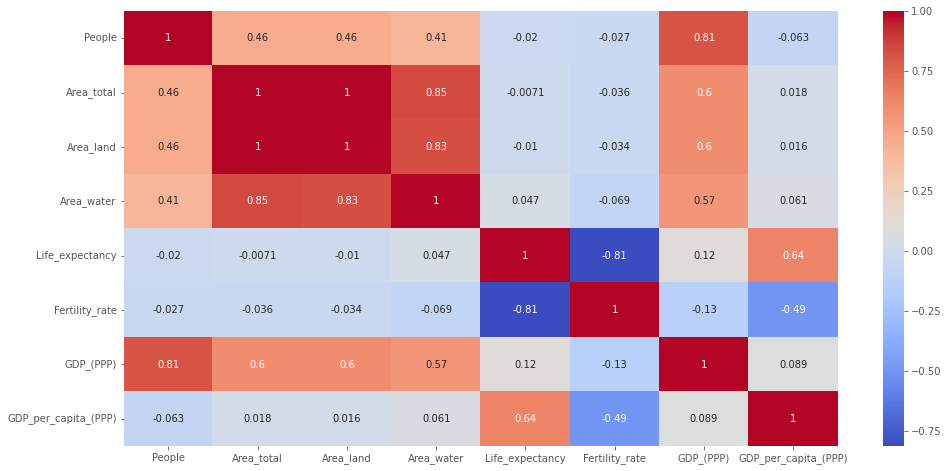

In [6]:
# Построим матрицу корреляций показателей по странам мира в ввиде тепловой карты
sns.heatmap(df.corr(), cmap="coolwarm", annot=True)

In [7]:
# Отсортируем датасет по убыванию численности населения (People)
df_sorted_people = df.sort_values('People', ascending=False)
df_sorted_people.head(10)

,Country,People,Area_total,Area_land,Area_water,Life_expectancy,Fertility_rate,GDP_(PPP),GDP_per_capita_(PPP)
42,China,1379302771,9596960,9326410,270550,75.7,1.60,23120.0,16600
91,India,1281935911,3287263,2973193,314070,68.8,2.43,9447.0,7200
206,United States,326625791,9833517,9147593,685924,80.0,1.87,19360.0,59500
92,Indonesia,260580739,1904569,1811569,93000,73.0,2.11,3243.0,12400
27,Brazil,207353391,8515770,8358140,157630,74.0,1.75,3219.0,15500
148,Pakistan,204924861,796095,770875,25220,68.1,2.62,1056.0,5400
145,Nigeria,190632261,923768,910768,13000,53.8,5.07,1118.0,5900
16,Bangladesh,157826578,148460,130170,18290,73.4,2.17,686.5,4200
160,Russia,142257519,17098242,16377742,720500,71.0,1.61,4000.0,27900
100,Japan,126168156,377915,364485,13430,85.5,1.42,5443.0,42900


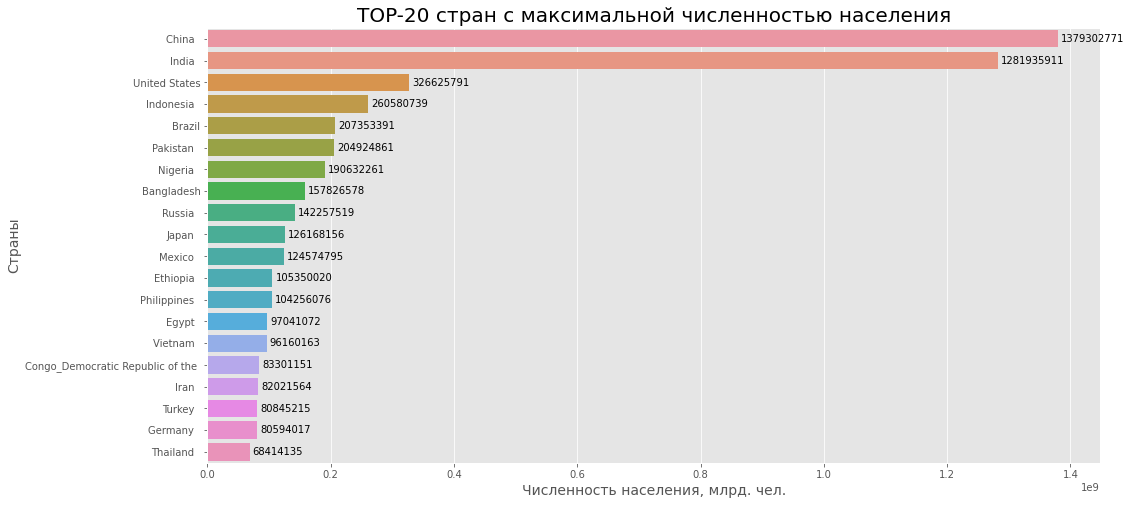

In [10]:
# Визуализируем TOP-20 стран с максимальной численностью населения
df_people_top_20 = df_sorted_people.head(20)
ax = sns.barplot(data=df_people_top_20, x='People', y='Country')
plt.title("TOP-20 стран с максимальной численностью населения", fontsize = 20)
plt.xlabel("Численность населения, млрд. чел.", fontsize = 14)
plt.ylabel("Страны", fontsize = 14)
# выводим подписи данных (численность населения)
for p in ax.patches:
    height = p.get_height() # высота каждого горизонтального столбца (строки)
    width = p.get_width() # ширина каждого горизонтального столбца (численность населения)
    ax.text(x = width+5*1000000, # x-координатное положение метки, дополненное 5000000 справа от строки
    y = p.get_y()+(height/2), # y-координатное положение метки, дополненное так, чтобы она находилась посередине строки
    s = '{:.0f}'.format(width), # метка данных, отформатированная для игнорирования десятичных знаков
    va = 'center') # устанавливает вертикальное выравнивание (va) по центру

На диаграмме видно, что первые два места по численности населения с большим отрывом занимают Китай и Индия, на третьем месте США, у России - девятое место.

Text(0.5, 0, 'Коэффициент рождаемости')

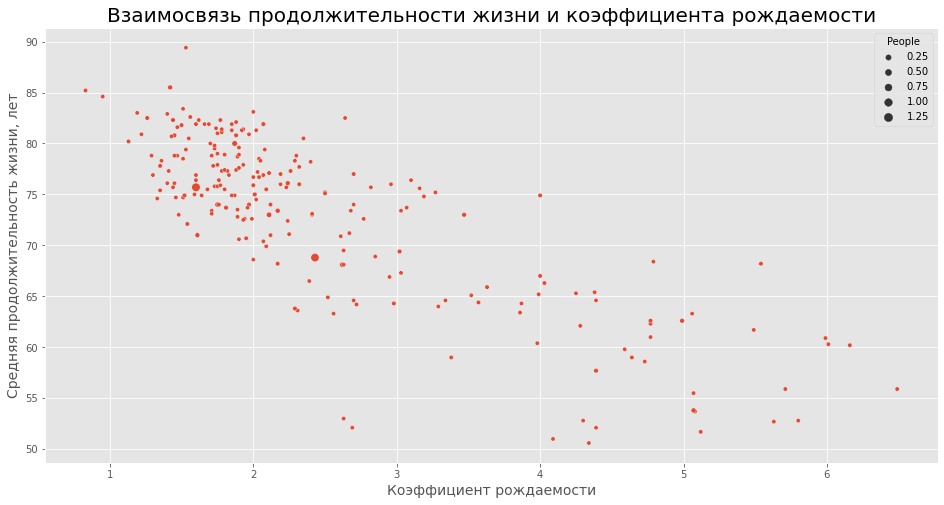

In [11]:
# Учитывая наличие сильной корреляции (-0.81) между показателями: 
# Продолжительность жизни (Life_expectancy) и Коэффициент фертильности (Fertility_rate), 
# для визуализации взаимосвязи этих показателей построим scatterplot,
# толщину точек установим в зависимости от численности населения 
scat = sns.scatterplot(data=df, x='Fertility_rate', y='Life_expectancy', size='People')
scat.axes.set_title("Взаимосвязь продолжительности жизни и коэффициента рождаемости", fontsize=20)
scat.set_ylabel("Средняя продолжительность жизни, лет", fontsize=14)
scat.set_xlabel("Коэффициент рождаемости", fontsize=14)

Анализ графика показывает, что с падением средней продолжительности жизни по странам мира растет суммарный коэффициент рождаемости (или коэффициент фертильности).

Две самые крупные точки на графике соответствуют Китаю и Индии. 

Text(0.5, 0, 'Коэффициент рождаемости')

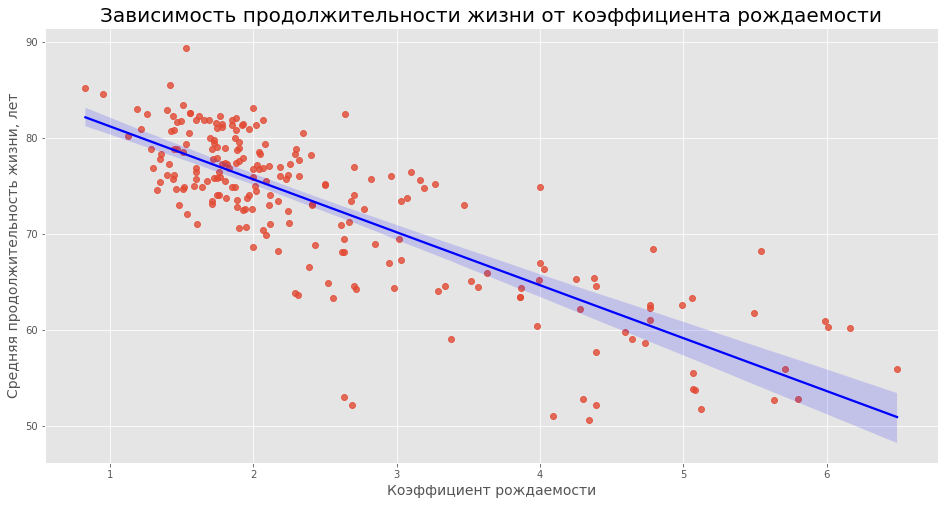

In [12]:
# Визуализируем линейную регрессию между этими показателями:
# средняя продолжительность жизни (Life_expectancy) и коэффициент рождаемости (Fertility_rate)
reg = sns.regplot(data=df, x='Fertility_rate', y='Life_expectancy', line_kws={"color":"b"})
reg.axes.set_title("Зависимость продолжительности жизни от коэффициента рождаемости", fontsize=20)
reg.set_ylabel("Средняя продолжительность жизни, лет", fontsize=14)
reg.set_xlabel("Коэффициент рождаемости", fontsize=14)

Анализ графика показывает, что в странах мира с минимальным значением коэффициента рождаемости наблюдается максимальная продолжительность жизни (80+).

При этом, по данным 2017 года уровню воспроизводства населения (коэффициент рождаемости 2,1 рождений на женщину) соответствует средняя продолжительность жизни в 75 лет.

Text(0.5, 0, 'ВВП на душу населения, $')

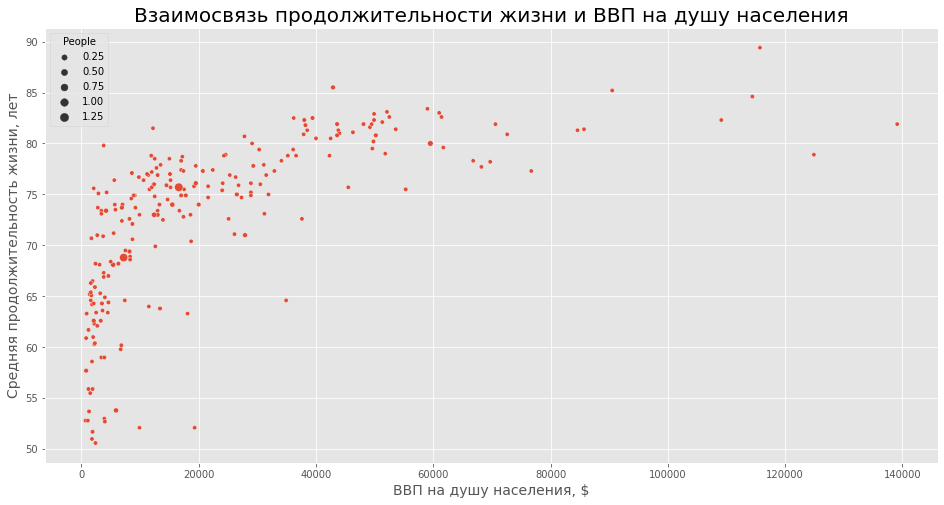

In [13]:
# Между показателями: Средняя продолжительность жизни (Life_expectancy) и
# ВВП на душу населения (GDP_per_capita_(PPP) также наблюдается взаимосвязь (коэффициент корреляции 0.64) 
# Для визуализации этой взаимосвязи построим scatterplot,
# толщину точек установим в зависимости от численности населения (People)
scat = sns.scatterplot(data=df, x='GDP_per_capita_(PPP)', y='Life_expectancy', size='People')
scat.axes.set_title("Взаимосвязь продолжительности жизни и ВВП на душу населения", fontsize=20)
scat.set_ylabel("Средняя продолжительность жизни, лет", fontsize=14)
scat.set_xlabel("ВВП на душу населения, $", fontsize=14)

Разброс точек показывает наличие нелинейной взаимосвязи между показателями.

Text(0.5, 0, 'ВВП на душу населения, $')

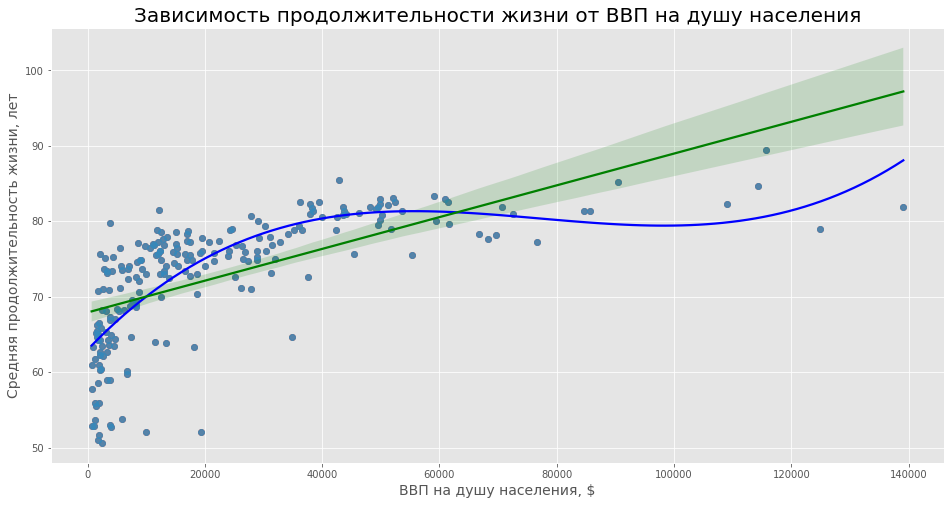

In [ ]:
# Построим графики линейной и нелинейной регрессии между этими показателями:
# средняя продолжительность жизни (Life_expectancy) и ВВП на душу населения (GDP_per_capita_(PPP)
reg = sns.regplot(data=df, x='GDP_per_capita_(PPP)', y='Life_expectancy', order=3, line_kws={"color":"b"}, ci=None)
reg = sns.regplot(data=df, x='GDP_per_capita_(PPP)', y='Life_expectancy', order=1, line_kws={"color":"g"})
reg.axes.set_title("Зависимость продолжительности жизни от ВВП на душу населения", fontsize=20)
reg.set_ylabel("Средняя продолжительность жизни, лет", fontsize=14)
reg.set_xlabel("ВВП на душу населения, $", fontsize=14)

Рисунок показывает, что в странах с высоким ВВП на душу населения средняя продолжительность жизни также выше (коэффициент корреляции 0.64). 

При этом, можно предположить, что полиномиальная регрессия (синяя линия) лучше описывает взаимосвязь между показателями, чем линейная регрессия (зеленая).

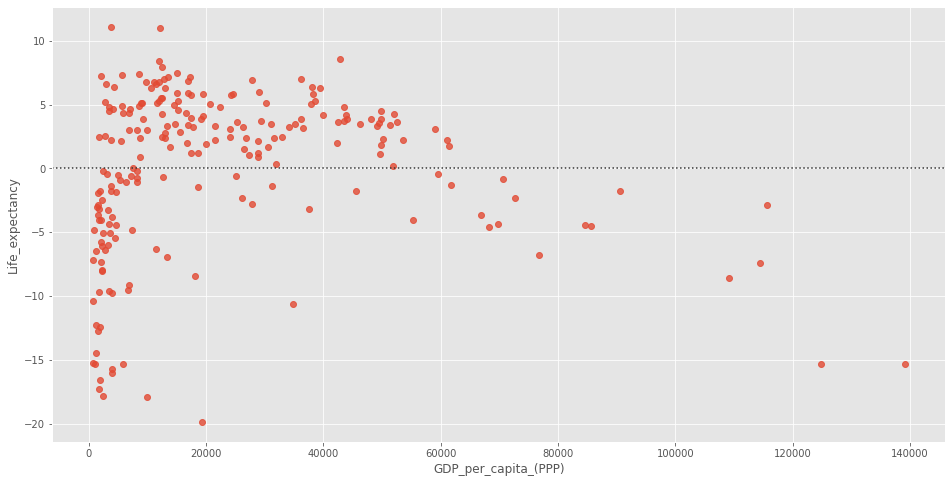

In [28]:
# График остатков после построения линейной модели регрессии
sns.residplot(data=df, x='GDP_per_capita_(PPP)', y='Life_expectancy')

### Наличие структуры точек на графике остатков линейной регрессии подтверждает нелинейность взаимосвязи между показателями: средняя продолжительность жизни и ВВП на душу населения.